# Demand prediction baseline solution

Victor Kantor, xead.wl@gmail.com

In [1]:
import numpy as np

In [2]:
import pandas as pd

train = pd.read_csv("train.tsv")
test = pd.read_csv("test.tsv")
sample_submission = pd.read_csv("sample_submission.tsv")

In [3]:
def smape(y_pred, y_true):
    assert(len(y_pred) == len(y_true))
    
    numerator = abs(y_pred - y_true)
    denomerator = (abs(y_pred) + abs(y_true)) / 2
    ans = (100.0 / len(y_pred)) * np.sum(numerator / denomerator)
    return ans

In [38]:
frac = 0.1 # fraction of learning examples used for model fitting

# sample the train set if your don't want to deel with all examples
train_sampled = train.sample(frac=frac)

X = train_sampled.drop(['Num','y'], axis=1)
y = train_sampled['y']
print len(X), len(y)

7246 7246


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

58410.0
max: 34995.0
mean: 24208.2333333
69990.0


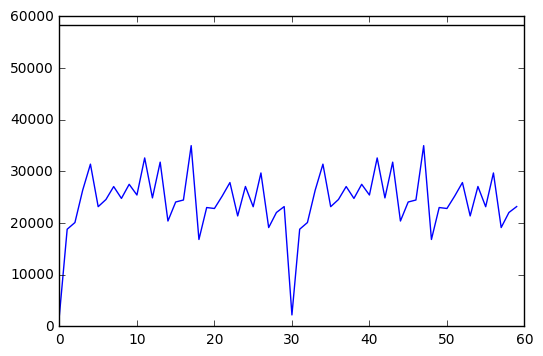

In [8]:
ii = 1

print(train.iloc[ii]['y'])

tmp = train.iloc[ii][6:].values

print('max: {}'.format(max(tmp)))
print('mean: {}'.format(np.mean(tmp)))
print(max(tmp) * 2)

plt.plot(tmp)
plt.hlines(train.iloc[ii]['y'], 0, 60)
plt.show()

In [9]:
train_sampled.head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
48062,237202,45968,2014,20,3,20449345,46853.0,18757.0,21903.0,22677.0,...,23693.0,32860.0,21146.0,16796.0,22965.0,30866.0,23756.0,21758.0,25943.0,32099.0
49849,246988,189641,2014,22,2,20438607,92470.0,132073.0,54480.0,95851.0,...,61957.0,87844.0,84157.0,92295.0,77286.0,86469.0,92494.0,114918.0,87267.0,86051.0
53822,267046,193,2014,28,2,20449471,0.0,0.0,0.0,0.0,...,330.0,110.0,110.0,110.0,40.0,10.0,50.0,70.0,110.0,140.0
40860,200853,140517,2014,9,3,20439381,93880.0,97875.0,102114.0,92840.0,...,60650.0,77410.0,108630.0,121684.0,83240.0,31091.0,60401.0,86600.0,79967.0,76225.0
47762,236902,15922,2014,19,2,20443944,4750.0,2416.0,2940.0,3830.0,...,6010.0,5500.0,6410.0,5440.0,8080.0,7601.0,7680.0,7399.0,9600.0,12420.0


# Just to Validate the trained Model

In [96]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

frac = 0.5
train_sampled = train.sample(frac=frac)

X = train_sampled.drop(['Num','y'], axis=1)
y = train_sampled['y']
print len(X), len(y)


frac = 0.5
train_sampled = train.sample(frac=frac)

X_valid = train_sampled.drop(['Num','y'], axis=1)
y_valid = train_sampled['y']
print len(X_valid), len(y_valid)

smape(model.predict(X_valid), y_valid.values)

36229 36229


AttributeError: 'NoneType' object has no attribute 'tree_'

In [112]:
%%time
import xgboost
from xgboost import XGBRegressor

# THIS is the Top model

# fit model no training data
model_xg = xgboost.XGBRegressor(n_estimators=150, max_depth=20)
model_xg.fit(X_dr, y)

CPU times: user 13.7 s, sys: 162 ms, total: 13.8 s
Wall time: 14.3 s


In [113]:
# make predictions for test data
smape(model_xg.predict(X_valid_dr), y_valid.values)

13.876031126684595

In [119]:
ttt = list(test.columns.values[5:-2])
ttt.append('Num')

In [121]:
preds = model_xg.predict(test.drop(ttt, axis=1))
print len(preds)
print len(sample_submission)

2016
2016


In [85]:
frac = 0.1
train_sampled = train.sample(frac=frac)
train_sampled = train_sampled[col_params]
X_gb = train_sampled.drop(['Num','y'], axis=1)
y_gb = train_sampled['y']

In [86]:
model_xg_2 = xgboost.XGBRegressor(max_depth=20, reg_alpha=0.01, reg_lambda=5, min_child_weight=4)
model_xg_2.fit(X_gb, y_gb)
smape(model_xg_2.predict(X_valid), y_valid.values)

37.042437807250771

In [123]:
sample_submission['y'] = preds

In [124]:
sample_submission.head(5)

,Num,y
0,348622,2471.596191
1,348623,21970.435547
2,348624,268764.937500
3,348625,37329.828125
4,348626,173.291077


In [125]:
# In GBM you can get some negative predictions:
print sample_submission[sample_submission['y'] < 0]

        Num          y
954  350467 -54.870773


In [126]:
sample_submission['y'] = sample_submission['y'].map(lambda x: x if x > 0 else 0.0)

In [127]:
sample_submission.to_csv("baseline_submission.tsv", sep=',', index=False)